In [36]:
# Import statements
import numpy as np
import pandas as pd
import sqlite3

In [37]:
# Connecting to sqlite 
conn = sqlite3.connect('pudl_subset.sqlite')

# Creating a cursor object using the cursor() method 
cursor = conn.cursor()

In [38]:
# Show all tables in database
tables_query = """SELECT name FROM sqlite_master  
                  WHERE type='table';"""
cursor.execute(tables_query)
table_list = cursor.fetchall()
print(table_list)

[('yearly_plant_generation',), ('monthly_generation_grouped',)]


### Database columns explained
Descriptions from: https://data.catalyst.coop/pudl/out_ferc1__yearly_all_plants

- report_year: "Four-digit year in which the data was reported."
- utility_id_ferc1: "PUDL-assigned utility ID, identifying a FERC1 utility. This is an auto- incremented ID and is not expected to be stable from year to year."
- utility_id_pudl: "A manually assigned PUDL utility ID. May not be stable over time."
- utility_name_ferc1: "Name of the responding utility, as it is reported in FERC Form 1. For human readability only."
- plant_id_pudl: "A manually assigned PUDL plant ID. May not be constant over time."
- plant_id_ferc1: "Algorithmically assigned PUDL FERC Plant ID. WARNING: NOT STABLE BETWEEN PUDL DB INITIALIZATIONS."
- plant_name_ferc1: "Name of the plant, as reported to FERC. This is a freeform string, not guaranteed to be consistent across references to the same plant."
- net_generation_mwh: "Net electricity generation for the specified period in megawatt-hours (MWh)."
- fuel_cost_per_mwh: "Derived from MCOE, a unit level value. Average fuel cost per MWh of heat content in nominal USD."
- plant_type: "Type of plant."
- fuel_type: "Type of fuel."
- net_load_mwh: "Net output for load (net generation - energy used for pumping) in megawatt- hours."

### Import database into Pandas dataframe
There is currently only one table in the database. This is how you import it into Pandas.

In [39]:
pudl_yearly_df = pd.read_sql_query("SELECT * FROM yearly_plant_generation", conn)

In [40]:
# Filter the dataframe for entries with zip codes that start with 20, 21, 22, or 23
filtered_zip_df = pudl_yearly_df[pudl_yearly_df['zip_code'].astype(str).str.startswith(('20', '21', '22', '23'))]

# Display the filtered dataframe
filtered_zip_df

,report_year,utility_id_ferc1,utility_id_pudl_x,utility_name_ferc1,plant_id_pudl,plant_id_ferc1,plant_name_ferc1,net_generation_mwh,fuel_cost_per_mwh,plant_type,...,city,county,latitude,longitude,state,street_address,zip_code,utility_id_eia,utility_name_eia,utility_id_pudl_y
1534,2011,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,2.235231e+06,33.707893,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1535,2012,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,4.053230e+06,26.014851,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1536,2013,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,3.732706e+06,33.751797,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1537,2014,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,3.170118e+06,50.353065,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1538,2015,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,3.461422e+06,32.774944,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78688,2022,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.135089e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,58468.0,Dominion Renewable Energy,1498.0
78689,2022,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.135089e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,64711.0,fort powhatan solar,13981.0
78690,2023,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.128501e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,58468.0,Dominion Renewable Energy,1498.0
78691,2023,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.128501e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,64711.0,fort powhatan solar,13981.0


### Import monthly data into Pandas from database
This is likely the data we will use the most

In [41]:
# This doesn't currently work
pudl_monthly_df = pd.read_sql_query("SELECT * FROM monthly_generation_grouped", conn)
pudl_monthly_df.tail()

,report_date,state,SUM(net_generation_mwh)
14399,2024-01-01,VT,NaN
14400,2024-01-01,WA,NaN
14401,2024-01-01,WI,NaN
14402,2024-01-01,WV,NaN
14403,2024-01-01,WY,NaN


In [42]:
# Filter out entries with report date '2024-01-01'
pudl_monthly_df = pudl_monthly_df[pudl_monthly_df['report_date'] != '2024-01-01']

In [43]:
# Convert report_date to datetime
pudl_monthly_df['report_date'] = pd.to_datetime(pudl_monthly_df['report_date'])

# Filter the DataFrame for entries with report_date after 2018-01-01
filtered_pudl_monthly_df = pudl_monthly_df[pudl_monthly_df['report_date'] > '2017-12-01']

In [44]:
# Different values for type of plant
plant_types = pudl_yearly_df['plant_type'].unique()
print("Different plant types:", plant_types)

# Different values for type of fuel
fuel_types = pudl_yearly_df['fuel_type'].unique()
print("Different fuel types:", fuel_types)

Different plant types: ['steam' 'combustion_turbine' 'hydro' 'internal_combustion' None
 'combined_cycle' 'wind' 'nuclear' 'run_of_river' 'storage' 'geothermal'
 'photovoltaic' 'solar_thermal' 'run_of_river_with_storage' 'fuel_cell']
Different fuel types: [None 'hydro' 'wind' 'oil' 'solar' 'gas' 'coal' 'other' 'nuclear' 'waste']


In [45]:
# Function to get the schema of a table
def get_table_schema(table_name):
    schema_query = f"PRAGMA table_info({table_name});"
    cursor.execute(schema_query)
    schema = cursor.fetchall()
    return schema

# Get schema for each table
for table in table_list:
    table_name = table[0]
    schema = get_table_schema(table_name)
    print(f"Schema for table {table_name}:")
    for column in schema:
        print(f"  {column[1]} ({column[2]})")
    print("\n")

Schema for table yearly_plant_generation:
  report_year (BIGINT)
  utility_id_ferc1 (BIGINT)
  utility_id_pudl_x (BIGINT)
  utility_name_ferc1 (TEXT)
  plant_id_pudl (BIGINT)
  plant_id_ferc1 (FLOAT)
  plant_name_ferc1 (TEXT)
  net_generation_mwh (FLOAT)
  fuel_cost_per_mwh (FLOAT)
  plant_type (TEXT)
  fuel_type (TEXT)
  net_load_mwh (FLOAT)
  plant_id_eia (FLOAT)
  plant_name_eia (TEXT)
  city (TEXT)
  county (TEXT)
  latitude (FLOAT)
  longitude (FLOAT)
  state (TEXT)
  street_address (TEXT)
  zip_code (TEXT)
  utility_id_eia (FLOAT)
  utility_name_eia (TEXT)
  utility_id_pudl_y (FLOAT)


Schema for table monthly_generation_grouped:
  report_date (TEXT)
  state (TEXT)
  SUM(net_generation_mwh) (FLOAT)




In [46]:
# Query to select the first few rows of the yearly_plant_generation table
yearly_plant_generation = pd.read_sql_query("SELECT * FROM yearly_plant_generation", conn)

# Display the head of the dataframe
yearly_plant_generation.head()

,report_year,utility_id_ferc1,utility_id_pudl_x,utility_name_ferc1,plant_id_pudl,plant_id_ferc1,plant_name_ferc1,net_generation_mwh,fuel_cost_per_mwh,plant_type,...,city,county,latitude,longitude,state,street_address,zip_code,utility_id_eia,utility_name_eia,utility_id_pudl_y
0,1995,185,69,Cleco Power LLC,1,1468.0,dolet hills,2246698.0,15.078641,steam,...,Mansfield,None,32.030556,-93.569168,LA,963 Power Plant Rd,71052,3265.0,Cleco Power LLC,69.0
1,1996,185,69,Cleco Power LLC,1,1468.0,dolet hills,2040348.0,16.029879,steam,...,Mansfield,None,32.030556,-93.569168,LA,963 Power Plant Rd,71052,3265.0,Cleco Power LLC,69.0
2,1998,185,69,Cleco Power LLC,1,1468.0,dolet hills,2172549.0,16.347895,steam,...,Mansfield,None,32.030556,-93.569168,LA,963 Power Plant Rd,71052,3265.0,Cleco Power LLC,69.0
3,1999,185,69,Cleco Power LLC,1,1468.0,dolet hills,1811051.0,19.006699,steam,...,Mansfield,None,32.030556,-93.569168,LA,963 Power Plant Rd,71052,3265.0,Cleco Power LLC,69.0
4,2001,185,69,Cleco Power LLC,1,1468.0,dolet hills,2268409.0,18.334631,steam,...,Mansfield,None,32.030556,-93.569168,LA,963 Power Plant Rd,71052,3265.0,Cleco Power LLC,69.0


In [47]:
# Group by report_year and state, then sum the net_generation_mwh for each group
combined_states_yearly_df = yearly_plant_generation.groupby(['report_year', 'state'])['net_generation_mwh'].sum().reset_index()

# Display the combined dataframe
combined_states_yearly_df.tail()

,report_year,state,net_generation_mwh
1387,2023,VT,2.136242e+05
1388,2023,WA,2.902733e+07
1389,2023,WI,6.805362e+07
1390,2023,WV,7.785721e+07
1391,2023,WY,4.132082e+07


In [48]:
# Filter out states with zero net generation
filtered_yearly_plant_generation = yearly_plant_generation[yearly_plant_generation['net_generation_mwh'] > 0]

# Group by report_year and calculate the mean of net_generation_mwh for each year
average_generation_per_year = filtered_yearly_plant_generation.groupby('report_year')['net_generation_mwh'].mean().reset_index()

# Display the average generation per year
average_generation_per_year

,report_year,net_generation_mwh
0,1994,1.228911e+06
1,1995,1.236614e+06
2,1996,1.032574e+06
3,1997,1.233802e+06
4,1998,1.244649e+06
5,1999,1.426356e+06
6,2000,1.506155e+06
7,2001,1.390824e+06
8,2002,1.327151e+06
9,2003,1.463940e+06


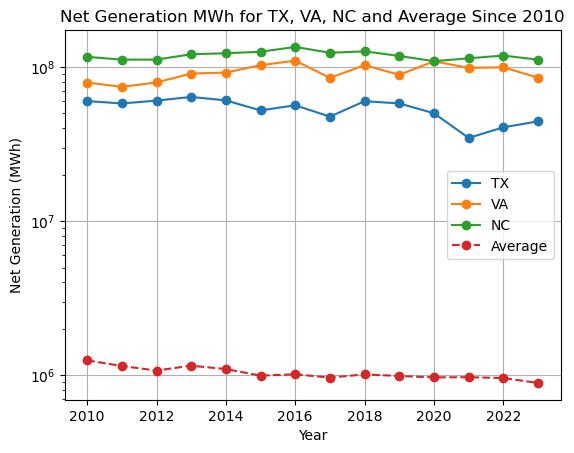

In [49]:
import matplotlib.pyplot as plt

# Filter data for the states TX, VA, and NC since 2010
states_to_plot = ['TX', 'VA', 'NC']
filtered_data = combined_states_yearly_df[(combined_states_yearly_df['state'].isin(states_to_plot)) & (combined_states_yearly_df['report_year'] >= 2010)]

# Plot the data for each state
for state in states_to_plot:
    state_data = filtered_data[filtered_data['state'] == state]
    plt.plot(state_data['report_year'], state_data['net_generation_mwh'], marker='o', label=state)

# Plot the average generation per year since 2010
average_data = average_generation_per_year[average_generation_per_year['report_year'] >= 2010]
plt.plot(average_data['report_year'], average_data['net_generation_mwh'], marker='o', linestyle='--', label='Average')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Net Generation (MWh)')
plt.title('Net Generation MWh for TX, VA, NC and Average Since 2010')
plt.legend()
plt.grid(True)

# Set y-axis to logarithmic scale
plt.yscale('log')

plt.show()

In [50]:
# Query to select entries from yearly_plant_generation where state is VA
va_entries_query = "SELECT * FROM yearly_plant_generation WHERE state = 'VA'"

# Execute the query and store the result in a dataframe
va_entries_df = pd.read_sql_query(va_entries_query, conn)

# Display the dataframe
#va_entries_df

In [51]:
# Group the dataframe by report_year and calculate the sum of net_generation_mwh and net_load_mwh for each year
grouped_va_entries_df = va_entries_df.groupby('report_year')[['net_generation_mwh', 'net_load_mwh']].sum(numeric_only=True)

# Display the grouped dataframe
grouped_va_entries_df

,net_generation_mwh,net_load_mwh
report_year,,
1994,6.580792e+07,-7.761500e+05
1995,6.764227e+07,-8.775580e+05
1996,4.603431e+07,-7.741290e+05
1997,4.610374e+07,-9.034660e+05
1998,7.475789e+07,-6.252680e+05
1999,7.668811e+07,-8.210190e+05
2000,8.000889e+07,-1.372944e+06
2001,8.171340e+07,-1.423464e+06
2002,7.699501e+07,-1.437057e+06


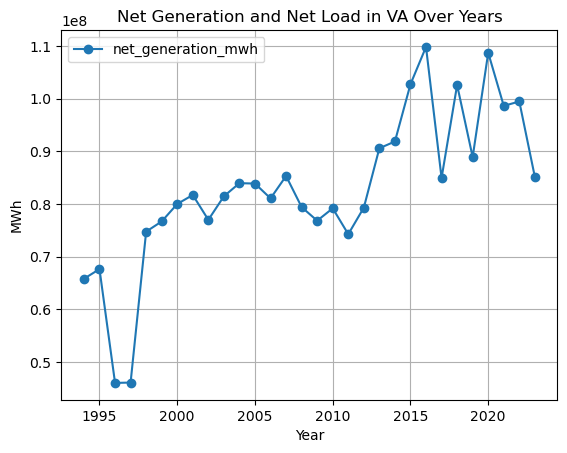

In [52]:
import matplotlib.pyplot as plt

# Plotting the data
grouped_va_entries_df.plot(y=['net_generation_mwh'], kind='line', marker='o')
plt.title('Net Generation and Net Load in VA Over Years')
plt.xlabel('Year')
plt.ylabel('MWh')
plt.grid(True)
plt.show()

In [53]:
# Different values for type of plant
plant_types = pudl_yearly_df['plant_type'].unique()
print("Different plant types:", plant_types)

# Different values for type of fuel
fuel_types = pudl_yearly_df['fuel_type'].unique()
print("Different fuel types:", fuel_types)

Different plant types: ['steam' 'combustion_turbine' 'hydro' 'internal_combustion' None
 'combined_cycle' 'wind' 'nuclear' 'run_of_river' 'storage' 'geothermal'
 'photovoltaic' 'solar_thermal' 'run_of_river_with_storage' 'fuel_cell']
Different fuel types: [None 'hydro' 'wind' 'oil' 'solar' 'gas' 'coal' 'other' 'nuclear' 'waste']


In [111]:
# Replace 'combustion_turbine' and 'combined_cycle' with 'natural_gas' in the plant_type column
pudl_yearly_df['plant_type'] = pudl_yearly_df['plant_type'].replace(['combustion_turbine', 'combined_cycle'], 'natural_gas')

pudl_yearly_df['plant_type'] = pudl_yearly_df['plant_type'].replace('coal', 'oil/coal')


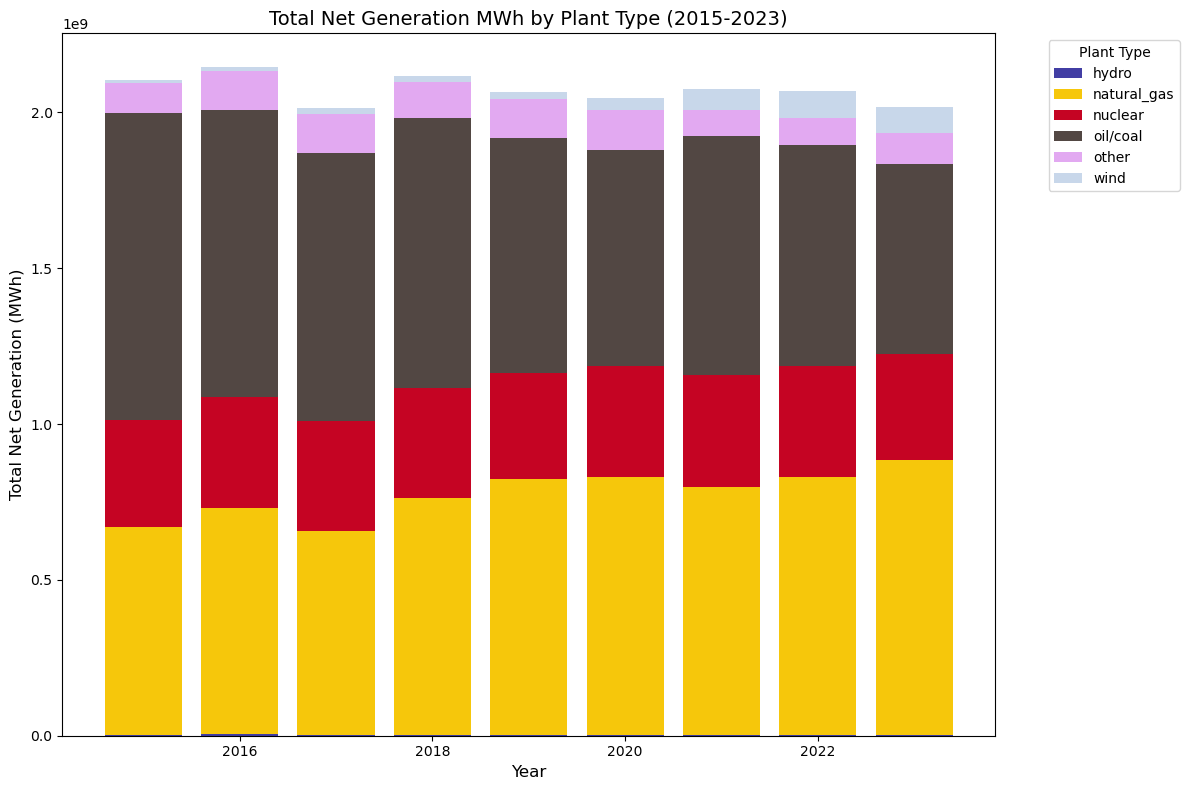

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming pudl_yearly_df is your dataframe
# Filter the dataframe for entries from the years 2015-2023
pudl_recent_df = pudl_yearly_df[pudl_yearly_df['report_year'].between(2015, 2023)]

# Select only the columns 'net_generation_mwh', 'report_year', and 'plant_type'
pudl_recent_df = pudl_recent_df[['report_year', 'net_generation_mwh', 'plant_type']]

# Define a list of explicitly mapped plant types
explicit_types = ['nuclear', 'natural_gas', 'hydro', 'wind', 'oil/coal']

# Replace all unspecified plant types with "other"
pudl_recent_df['plant_type'] = pudl_recent_df['plant_type'].apply(
    lambda x: x if x in explicit_types else 'other'
)

# Group by report_year and plant_type, summing the net_generation_mwh for each group
plant_type_generation = (
    pudl_recent_df.groupby(['report_year', 'plant_type'])['net_generation_mwh']
    .sum()
    .unstack(fill_value=0)  # Fill missing plant types with 0
)

# Prepare data for stacking
years = plant_type_generation.index
types = plant_type_generation.columns
values = plant_type_generation.values

# Define a custom aesthetic color map
color_map = {
    'nuclear': '#C50423',        # Soft red for nuclear
    'natural_gas': '#F6C70B',    # Soft yellow for natural gas
    'hydro': '#423EA4',          # Soft blue for hydro
    'wind': '#C8D7EA',           # Soft white/gray for wind
    'oil/coal': '#524743',          # Soft gray for steam
    'other': '#E2A9F1',          # Light gray for "other"
}

# Assign colors based on the plant type
colors = [color_map[plant_type] for plant_type in types]

# Plot stacked bars for each year
fig, ax = plt.subplots(figsize=(12, 8))
bottom_values = np.zeros(len(years))

for i, plant_type in enumerate(types):
    ax.bar(
        years, 
        plant_type_generation[plant_type], 
        bottom=bottom_values, 
        color=colors[i],  # Use predefined color for the plant type
        label=plant_type
    )
    bottom_values += plant_type_generation[plant_type]

# Add labels, legend, and formatting
ax.set_title("Total Net Generation MWh by Plant Type (2015-2023)", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Total Net Generation (MWh)", fontsize=12)
ax.legend(title="Plant Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

